In [1]:
# # print(mpimg.imread('./food/00000.jpg')[0])
# # print(cv2.imread('./food/00000.jpg')[0])
# kk = cv2.imread('./food/00001.jpg')
# kk = cv2.resize(kk,(224,224))
# from PIL import Image
# pp = Image.fromarray(kk,"RGB")
# pp.show()

# plt.imshow(kk)
# plt.show()

In [2]:
# S_dir = pd.Series(list(data_dir.glob('food/*')))
# S_dir.drop(0, inplace=True)

# df_dir = pd.DataFrame.from_dict(train_dir)
# df_dir.drop(0, axis=0, inplace=True)
# df_dir.reset_index(drop=True, inplace=True)

In [2]:
# import all libraries

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *

from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [4]:
img = mpimg.imread('./food/00001.jpg')
imgplot = plt.imshow(img)
plt.show()
print(img.shape)

FileNotFoundError: [Errno 2] No such file or directory: './food/00001.jpg'

In [5]:
IMAGE_SHAPE = (224, 224)
data_dir = Path('')

list(data_dir.glob('*/*.jpg'))[:5]

image_count = (list(data_dir.glob('*/*.jpg')))
print(image_count[0])

food = list(data_dir.glob('food/*'))

food\00000.jpg


In [6]:
train_dir = {'food': list(data_dir.glob('food/*'))} #contains the path to every image
aa = train_dir["food"].pop(0)       # there is one weird file which is not an image so i just got rid of it with this line
print(train_dir["food"][:5])

[WindowsPath('food/00000.jpg'), WindowsPath('food/00001.jpg'), WindowsPath('food/00002.jpg'), WindowsPath('food/00003.jpg'), WindowsPath('food/00004.jpg')]


In [64]:
X = []       #creating the array which will contain the images (224,224,3) 

for categoryy, images in train_dir.items():     # 20 sec to compute
    for imaaage in images:
        img = cv2.imread(str(imaaage))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        #y.append(flowers_labels_dict[categoryy])

X = np.array(X)
X = X/255    #15 sec to compute

In [65]:
X.shape

(10000, 224, 224, 3)

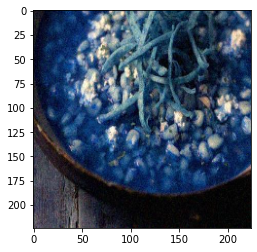

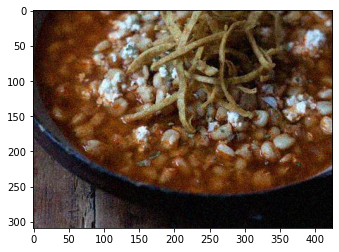

In [8]:
# here, verify that the first 5 images in X are image 00000, 00001, 00002, 00003, 00004
# after verification it is good, but weird colors (coming from cv2)

# plt.imshow(X[0], interpolation='nearest')
# plt.show()
# imgplot = plt.imshow( mpimg.imread('./food/00000.jpg') )
# plt.show()

# plt.imshow(X[1], interpolation='nearest')
# plt.show()
# imgplot = plt.imshow( mpimg.imread('./food/00001.jpg') )
# plt.show()

# plt.imshow(X[2], interpolation='nearest')
# plt.show()
# imgplot = plt.imshow( mpimg.imread('./food/00002.jpg') )
# plt.show()

# plt.imshow(X[3], interpolation='nearest')
# plt.show()
# imgplot = plt.imshow( mpimg.imread('./food/00003.jpg') )
# plt.show()

# plt.imshow(X[4], interpolation='nearest')
# plt.show()
# imgplot = plt.imshow( mpimg.imread('./food/00004.jpg') )
# plt.show()

plt.imshow(X[2888])
plt.show()
imgplot = plt.imshow( mpimg.imread('./food/02888.jpg') )
plt.show()




In [9]:
# Read data
df_train = pd.read_csv("train_triplets.txt", header = None)
df_test = pd.read_csv("test_triplets.txt", header = None)
# print("df train",df_train)
# print("df test",df_test)

In [10]:
# class_nbr = 2

# base_model = VGG16(weights='imagenet', include_top=False, input_tensor = Input(shape=(224, 224, 3)))

# # add a global spatial average pooling layer
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# # let's add a fully-connected layer
# x = Dense(1024, activation='relu')(x)
# # and a logistic layer -- let's say we have 200 classes
# predictions = Dense(class_nbr, activation='softmax')(x)

# # this is the model we will train
# model = Model(inputs=base_model.input, outputs=predictions)

# # first: train only the top layers (which were randomly initialized)
# # i.e. freeze all convolutional InceptionV3 layers
# for layer in base_model.layers:
#     layer.trainable = False

# # compile the model (should be done *after* setting layers to non-trainable)
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
# model.summary()


In [12]:
# def tripletloss(y_true, y_pred):
#     anchor_out = y_pred[:, 0:100]
#     positive_out = y_pred[:, 100:200]
#     negative_out = y_pred[:, 200:300]

#     pos_dist = K.sum(K.abs(anchor_out - positive_out), axis=1)
#     neg_dist = K.sum(K.abs(anchor_out - negative_out), axis=1)

#     prob = K.softmax([pos_dist,neg_dist], axis=0)
#     return K.mean(K.abs(prob[0]) + K.abs(1.0 - prob[1]))

In [13]:
# import random
# def data_generator(batch_size=64):
#     while True:
#         a = []
#         p = []
#         n = []
#         for _ in range(batch_size):
#             pos_neg = random.sample(classes, 2)
#             pos_sample = random.sample(list(x_train[y_train==pos_neg[0]]), 2)
#             neg_sample = random.choice(list(x_train[y_train==pos_neg[1]]))
#             a.append(pos_sample[0])
#             p.append(pos_sample[1])
#             n.append(neg_sample)
#         yield ([np.array(a) , np.array(p) , np.array(n)], np.zeros((batch_size, 1)).astype("float32"))

In [14]:
# triplet_model_a = Input((224,224,3))
# triplet_model_p = Input((224,224,3))
# triplet_model_n = Input((224,224,3))

# triplet_model_out = Concatenate()([model(triplet_model_a) , model(triplet_model_p) , model(triplet_model_n)])
# triplet_model = Model([triplet_model_a , triplet_model_p , triplet_model_n], triplet_model_out)
# triplet_model.summary()
# triplet_model.compile(loss=tripletloss, optimizer= "adam")

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 2)            15242050    input_2[0][0]                    
                                                                 input_3[0][0]              

In [0]:
# triplet_model.fit_generator(data_generator(), steps_per_epoch=150, epochs=10)
# triplet_model.save("triplet.h5")

In [22]:
# model_embeddings = triplet_model.layer[3].predict(x_test, verbose=1)
# print(model_embeddings.shape)

In [16]:
# creating a subset of the training data (file with the triplet)

Train = []
Train_concat = df_train.to_numpy()

for idx in range(len(Train_concat)):
    a = Train_concat[idx][0][0:5]
    b = Train_concat[idx][0][6:11]
    c = Train_concat[idx][0][12:17]
    array = np.array([a,b,c])
    Train.append(array)
Train = np.array(Train)
Train_red = Train[:300]     # subset of the training data (faster to train the model to get a first view of the classifier)
print(Train[0])
print(Train[0,0])

['02461' '03450' '02678']
02461


In [17]:
# Here we take a fully trained model which will compute the feature vectors

base_model = VGG16(weights='imagenet', include_top=False, input_tensor = Input(shape=(224, 224, 3)))
x = base_model.output
predictions = GlobalAveragePooling2D()(x)
model_fully_trained = Model(inputs=base_model.input, outputs=predictions)   #fully trained model
#  freeze all layers
for layer in model_fully_trained.layers:
    layer.trainable = False
# compile the model (should be done *after* setting layers to non-trainable)
model_fully_trained.compile(optimizer='adam', loss='categorical_crossentropy')
model_fully_trained.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [35]:
model = Sequential([Dense(512, input_dim=1536, activation="relu"),  #not trained model, we will train it from scratch
                    Dense(256, activation="relu"),
                    Dense(128, activation="relu"),
                    Dense(2, activation="softmax")
                    ])
model.compile(
  optimizer="adam",
  loss='categorical_crossentropy',
  metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               786944    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 258       
Total params: 951,426
Trainable params: 951,426
Non-trainable params: 0
_________________________________________________________________


In [19]:
# vec_tmp_test = model_fully_trained.predict(X)   # DO NOT RUN THIS BLOCK, READ COMMENT OF THE NEXT ONE
# (vec_tmp_test).shape                            # because it takes 15min to compute predictions

(2, 224, 224, 3)


(10000, 512)

In [1]:
# # save numpy array as npy file
# np.save('Features.npy', vec_tmp_test)


# load numpy array from npy file, this file is already saved
vec_tmp_test = np.load('Features.npy')
vec_tmp_test.shape

NameError: name 'np' is not defined

In [27]:
Train0 = []
Train1 = []

for i in range(len(Train_red)):     # creating 1 feature vector for each triplet (the feature vect from each of the 3 img are now 1)
    yoyo0 = np.concatenate((vec_tmp_test[int(Train_red[i,0])], vec_tmp_test[int(Train_red[i,1])], vec_tmp_test[int(Train_red[i,2])]))
    yoyo1 = np.concatenate((vec_tmp_test[int(Train_red[i,0])], vec_tmp_test[int(Train_red[i,2])], vec_tmp_test[int(Train_red[i,1])]))

    Train0.append(yoyo0)            # each triplet becomes 1 big vector, we stack them.
    Train1.append(yoyo1)            # since we took a subset of 300 triplet, we stacked 300 feature vector

In [55]:
Train0 = np.array(Train0)
Train1 = np.array(Train1)

Train_Final_red = np.concatenate((Train0,Train1))   # feature set composed of label 0 and label 1 (they are not mixed yet so 
Train_Final_red.shape                               # need to shuffle later)

Label0 = np.zeros(300, dtype="uint8")           # creating the labels
Label1 = np.ones(300, dtype="uint8")
Label_Final_red = np.concatenate((Label0,Label1))

random.seed(42)                                 # shuffle
random.shuffle(Train_Final_red)
random.shuffle(Label_Final_red)

print("Train_Final_red.shape = ", Train_Final_red.shape)
print("Label_Final_red.shape = ", Label_Final_red.shape)
type(Train_Final_red)

Train_Final_red.shape =  (600, 1536)
Label_Final_red.shape =  (600,)


numpy.ndarray

In [29]:
Train_Final_tuple_red = tuple(map(tuple, Train_Final_red))      #tried to convert features and labels in "tuple" type
Label_Final_tuple_red = tuple(Label_Final_red)

In [59]:
model.fit(Train_Final_red, Label_Final_red, epochs=5, batch_size=3)     #error everytime I dont know why

Epoch 1/5


ValueError: in user code:

    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\a4009\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (3, 1) and (3, 2) are incompatible


In [39]:
# THIS IS JUST A CODE FROM ANOTHER PROBLEM I USED TO CHECK WHAT TYPES THE FEATURES AND LABEL SHOULD HAVE BEFORE USING model.fit()

# import mnist
# # The first time you run this might be a bit slow, since the
# # mnist package has to download and cache the data.
# train_images = mnist.train_images()
# train_labels = mnist.train_labels()

# print(train_images.shape) # (60000, 28, 28)
# print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


In [40]:
# train_images = mnist.train_images()
# train_labels = mnist.train_labels()
# test_images = mnist.test_images()
# test_labels = mnist.test_labels()

# # Normalize the images.
# train_images = (train_images / 255) - 0.5
# test_images = (test_images / 255) - 0.5

# # Flatten the images.
# train_images = train_images.reshape((-1, 784))
# test_images = test_images.reshape((-1, 784))

# print(train_images.shape) # (60000, 784)
# print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [50]:
# print(type(train_labels[0]))
# print(train_labels.shape)

# print(type(Label_Final_red[0]))
# print(Label_Final_red.shape)

<class 'numpy.uint8'>
(60000,)
<class 'numpy.float64'>
(600,)
